### colab runtime 변경
- 코랩 런타임을 T4 GPU로 변경해주세요.
- 무료 버전 코랩을 사용할 경우, 하루 할당된 GPU가 제한되어 있어서 학습을 진행하다가 런타임이 끊길 수 있습니다.
- 로컬에 파이썬 설치가 가능하다면 로컬에서 진행하는 것을 추천드립니다.
- 로컬에서 진행할 경우엔 conda를 활용하여 가상환경을 세팅해주세요.

### Import Libraray

In [2]:
import os
import cv2
import glob
import shutil
import warnings
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

In [3]:
warnings.filterwarnings(action='ignore')

In [4]:
# 현재 실행 파일 경로 확인
os.getcwd()

'a:\\commento\\2_model'

### yolov5s 모델 설치 및 환경 설정

- 모델을 설치할 경로에 cd 명령어를 활용하여 들어가주세요

In [5]:
#cd /content/drive/MyDrive/comento/1

In [6]:
# 현재 파일 경로 확인 (원하는 경로에 들어와있는지 확인)
os.getcwd()

'a:\\commento\\2_model'

In [5]:
# git clone을 통해 yolov5s 모델 설치
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


### yolov5s 전이학습
- 전이학습을 진행할 때 사용되는 batch와 epoch에 대해서 정의도 같이 공부하면 좋을 것 같습니다.
- 전이학습 후에 나오는 최종모델파일은 마지막줄에 출력되는 "Results saved to yolov5/runs/train/yolov5s_results" 에 저장됩니다.

In [7]:
!pip install --upgrade Pillow


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import timeit
start = timeit.default_timer()

!python "yolov5/train.py" --img 224 --batch 20 --epochs 10 --data "dataset_config.yaml" --cfg "yolov5/models/yolov5s.yaml" --weights "yolov5s.pt" --name "yolov5s_results"

end = timeit.default_timer()
print(end-start)

#한글이 포함된 경로에서 오류 발생함. 영어 경로로 옮기고 해결 

3870.9113483000547


train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=dataset_config.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=20, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-365-g12b577c8 Python-3.12.2 torch-2.3.1+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=

### 전이학습 결과 확인
- 1주차 과제에서 생성한 testdataset을 기반으로 모델 성능을 평가합니다.

In [10]:
!python yolov5/val.py --img 224 --batch 60 --data dataset_config.yaml --weights yolov5/runs/train/yolov5s_results2//weights/best.pt

val: data=dataset_config.yaml, weights=['yolov5/runs/train/yolov5s_results2//weights/best.pt'], batch_size=60, imgsz=224, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-365-g12b577c8 Python-3.12.2 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning A:\commento\2_model\datasets\labels\val.cache... 1296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1296/1296 [00:00<?, ?it/s]
val: Scanning A:\commento\2_model\datasets\labels\val.cache... 1296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1296/1296 [00:00<?, ?it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/22 [00:00<?, ?it/s]
                 Class     Images

### 추론(inference) 진행
- 학습에 사용되지 않은 이미지를 한 장씩 넣어서 추론 결과 확인해보기
- 추론 속도와 추론 결과 이미지 확인

In [ ]:
# 필요할 경우 설치
# !pip install ultralytics

In [11]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
# 학습한 모델 불러오기
model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/yolov5s_results2/weights/best.pt', source='local')
model.conf = 0.5

YOLOv5  v7.0-365-g12b577c8 Python-3.12.2 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [16]:
# 추론을 진행할 이미지 불러오기
test_img_path = r'A:\commento\2_model\datasets\images\test\syn_00001.png'
img = Image.open(test_img_path)

In [17]:
# 추론 진행
results = model(img, size=224)

         xmin        ymin         xmax        ymax  confidence  class name
0  424.595703  554.534668   704.574402  862.568665    0.980703      0  car
1  675.385681  175.158905   920.610107  406.053802    0.973452      0  car
2  998.030090   92.056808  1293.998901  402.049561    0.964758      0  car


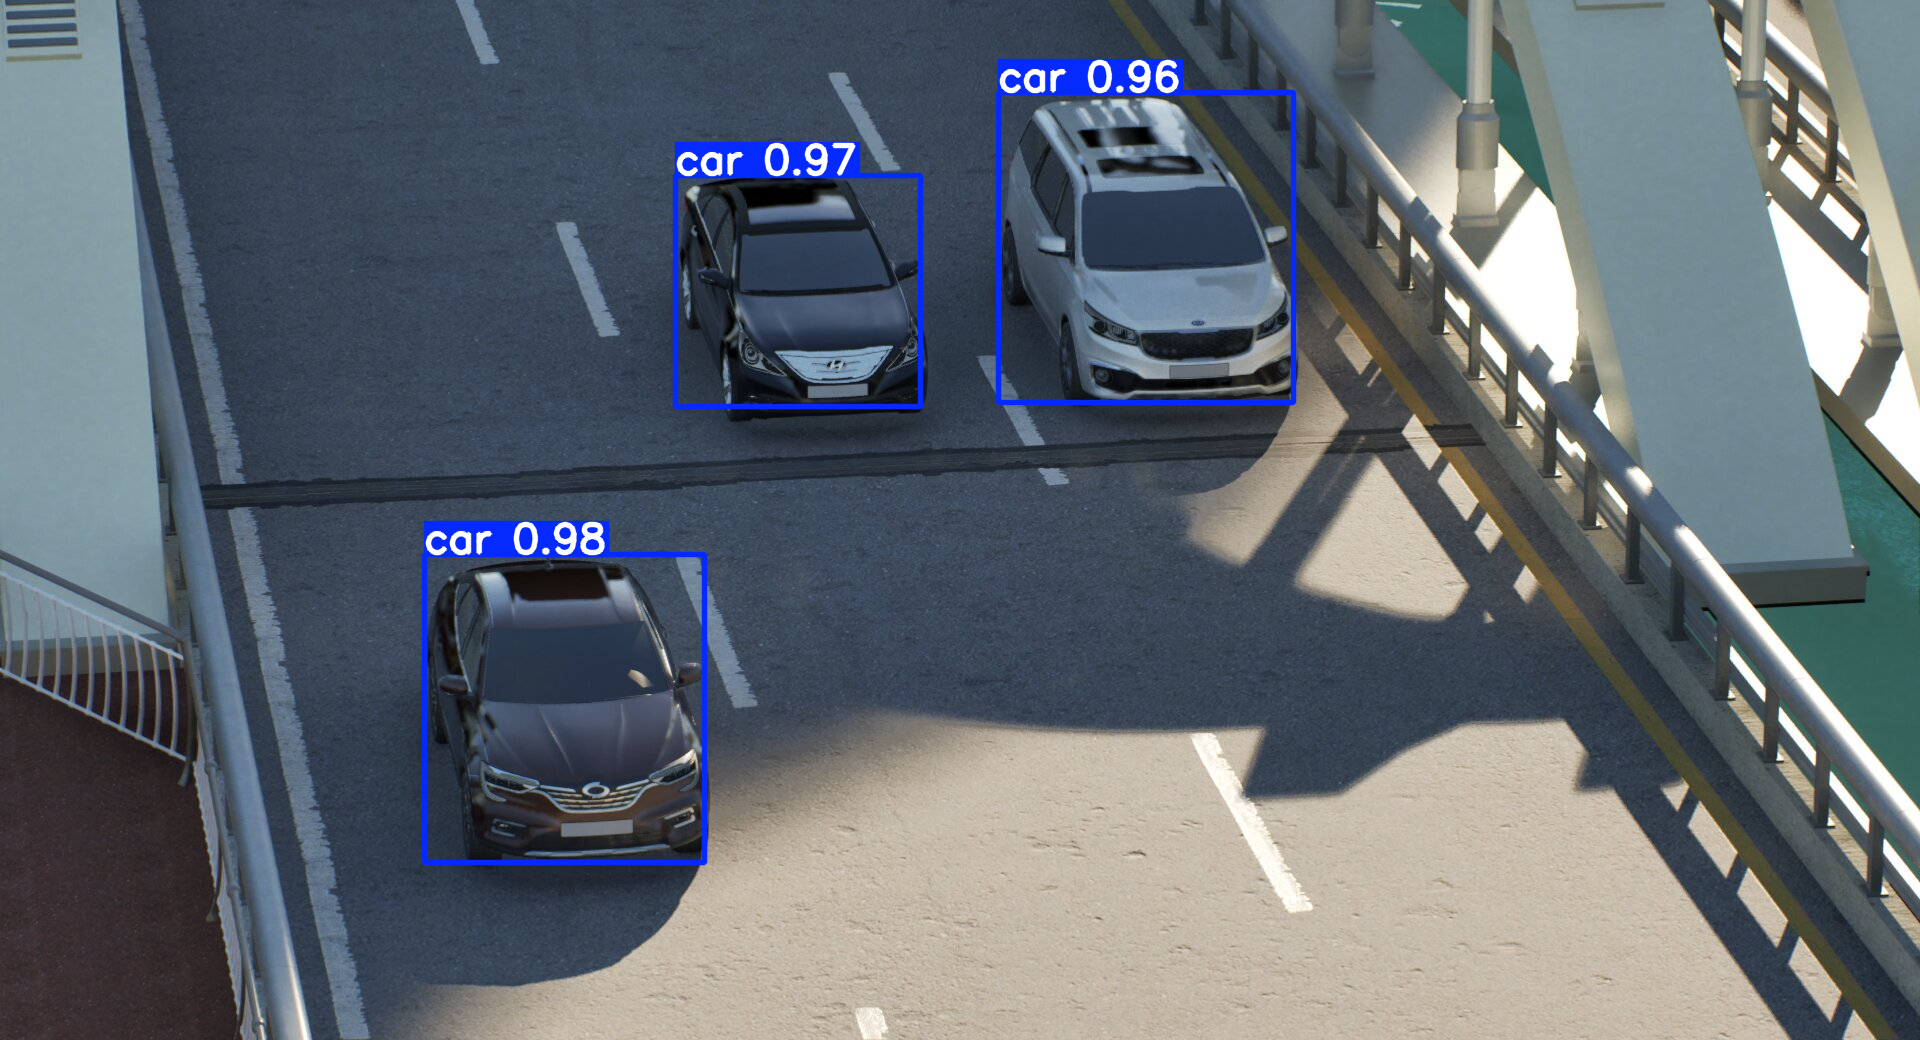

In [18]:
# 추론 결과 확인하기
print(results.pandas().xyxy[0])

# Save or display results
results.show()
plt.imshow(results.render()[0])
plt.axis('off')
plt.show()